In [3909]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3910]:
df = pd.read_csv("titanic.csv")

In [3911]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3912]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [3913]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [3914]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [3915]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [3916]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [3917]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [3918]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [3919]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [3920]:
print(df.isna().any().any())
print(df.isna().sum())

True
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3921]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [3922]:
# One-hot encode categorical variables
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['Sex', 'Embarked'], drop_first=True)

# Identify newly created one-hot encoded columns
categorical_cols = ['Sex_male', 'Embarked_Q', 'Embarked_S']  # Adjust based on actual columns

# Standardize each categorical column
for col in categorical_cols:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    
    # Avoid division by zero if std is 0
    if std != 0:
        df_encoded[col] = (df_encoded[col] - mean) / std
    else:
        df_encoded[col] = 0  # If std is 0, replace with 0 (no variation in data)

# Display the standardized dataset
print(df_encoded.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN  0.737281    -0.30739    0.618959  
1          PC 17599  71.2833   C85 -1.354813    -0.30739   -1.613803  
2  STON/O2. 3101282   7.9250   NaN -1.354813    -0.30739    0.618959  
3            113803  53.1000  C123 -1.3548

In [3923]:
New_df = df_encoded.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin'])

In [3924]:
corr_df = df.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin','Sex','Embarked'])
# Compute the correlation matrix
correlation_matrix = corr_df.corr()

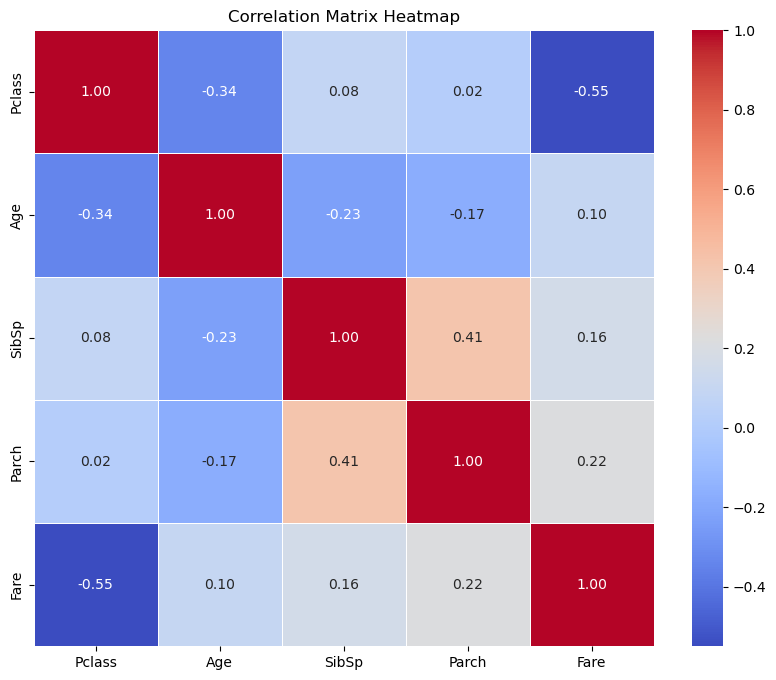

In [3925]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [3926]:
#features = ["Pclass", "Sex", "Age", "family", "Fare", "Embarked"]  # Select important features
X = New_df.values  # Convert to NumPy array
y = df["Survived"].values  # Target variable

In [3927]:
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Standardize features

In [3928]:
#Ensure reproducibility
np.random.seed(42)

In [3929]:
# Shuffle data indices
indices = np.arange(len(X))
np.random.shuffle(indices)

In [3930]:
# Compute split sizes
train_size = int(0.80 * len(X))
val_size = int(0.10 * len(X))

In [3931]:
# Split indices
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

In [3932]:
# Create splits
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]

In [3933]:
# Check sizes
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (712, 8), Validation set: (89, 8), Test set: (90, 8)


In [3934]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3935]:
# Compute cost function
def compute_cost(X, y, weights, bias):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights) + bias)
    
    # Avoid log(0) errors by clipping
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [3936]:
# Gradient Descent with Separate Bias Term
def gradient_descent(X_train, y_train, X_val, y_val, weights, bias, learning_rate=0.01, iterations=1000):
    m, n = X_train.shape  # m = samples, n = features

    # Initialize weights and bias separately
    weights = np.zeros(n)  # Feature weights
    bias = 0  # Bias term

    train_cost_history = []
    val_cost_history = []

    for _ in range(iterations):
        # Predictions with explicit bias
        predictions = sigmoid(np.dot(X_train, weights) + bias)

        # Compute gradients
        gradient_weights = np.dot(X_train.T, (predictions - y_train)) / m  # Feature weight updates
        gradient_bias = np.sum(predictions - y_train) / m  # Bias update

        # Update weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Compute cost for training and validation
        train_cost = compute_cost(X_train, y_train, weights, bias)
        val_cost = compute_cost(X_val, y_val, weights, bias)
        
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)

    return weights, bias, train_cost_history, val_cost_history

In [3937]:
# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

In [3938]:
# Train model 
learning_rate = 0.5
iterations = 80
weights, bias, train_cost_history, val_cost_history = gradient_descent(    X_train, y_train, X_val, y_val, weights, bias, learning_rate, iterations)


In [3939]:
def predict(X, weights, bias, threshold=0.5):
    probabilities = sigmoid(np.dot(X, weights) + bias)
    return (probabilities >= threshold).astype(int)  # Convert to binary labels

In [3940]:
def compute_accuracy(X, y, weights, bias):
    y_pred = (sigmoid(np.dot(X, weights) + bias) >= 0.5).astype(int) 
    return np.mean(y_pred == y)  

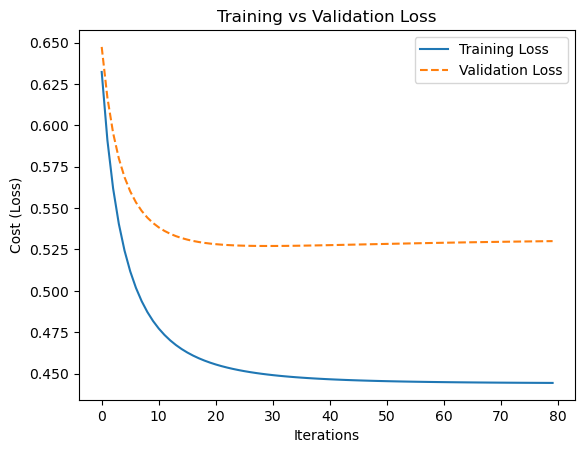

In [3941]:
# Plot Training & Validation Loss
plt.plot(range(len(train_cost_history)), train_cost_history, label='Training Loss')
plt.plot(range(len(val_cost_history)), val_cost_history, label='Validation Loss', linestyle='dashed')
plt.xlabel("Iterations")
plt.ylabel("Cost (Loss)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [3942]:
'''
# Get probability predictions for validation set
y_probs_val = predict(X_val, weights,bias)  # Predict probabilities on validation set

# Ensure `y_val` is a NumPy array
y_val = np.array(y_val)

# Compute the best threshold
thresholds = np.linspace(0.01, 0.99, 50)
best_threshold = 0.5
best_f1 = 0


# Function to compute precision, recall, and F1-score
def compute_f1(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    # Avoid division by zero
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f1

# Find the best threshold using validation data
for t in thresholds:
    y_pred_val = np.where(y_probs_val >= t, 1, 0)  # Convert probabilities to binary
    f1 = compute_f1(y_val, y_pred_val)  # Compute F1 score
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t  # Update best threshold

print(f"Best Threshold (from validation): {best_threshold}, Best F1 Score: {best_f1:.4f}")
'''

Best Threshold (from validation): 0.01, Best F1 Score: 0.6667


In [ ]:
'''
f1_scores = [compute_f1(y_val, np.where(y_probs_val >= t, 1, 0)) for t in thresholds]
plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.show()
'''

In [3943]:
# Predict on test data
y_pred_test = predict(X_test, weights,bias)  # Ensure predict function returns binary values (0/1)

# Convert probabilities to binary (if needed)
y_pred_test = np.where(y_pred_test >= 0.5, 1, 0)

# Compute True Positives, False Positives, False Negatives
TP = np.sum((y_pred_test == 1) & (y_test == 1))
FP = np.sum((y_pred_test == 1) & (y_test == 0))
FN = np.sum((y_pred_test == 0) & (y_test == 1))

# Compute Precision and Recall
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Compute F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")

Test Precision: 0.7241
Test Recall: 0.8400
Test F1 Score: 0.7778


In [3944]:
# Print confusion matrix
print("Confusion Matrix:")
print(f"TP: {TP}  FP: {FP}")
print(f"FN: {FN}  TN: {TN}")

Confusion Matrix:
TP: 21  FP: 8
FN: 4  TN: 64


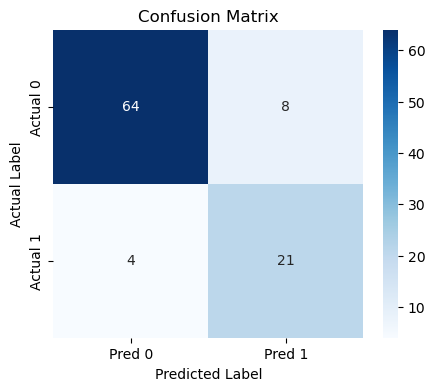

In [3945]:
# Create confusion matrix as a 2x2 array
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Plot using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [3946]:
# Compute test accuracy
test_accuracy = compute_accuracy(X_test, y_test, weights,bias)
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")
# Compute validation accuracy
val_accuracy = compute_accuracy(X_val, y_val, weights,bias)
print(f"Validation Set Accuracy: {val_accuracy * 100:.2f}%")

Test Set Accuracy: 86.67%
Validation Set Accuracy: 71.91%


In [ ]:
'''
import matplotlib.pyplot as plt
plt.hist(y_probs_val, bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()
'''